# Case Study 3:  The DNA approach to near-term correlation.

This is a visualization technique developed by scientists studying DNA.  Whenever you have a sequence with an alphabet of 4 letters (like DNA), there's an especially cool technique to see near-term correlations.  The idea is to create a grid of four squares according to the four letters.  Then subdivide each square into four squares again.  And so on.  Label the regions by their "coordinates", i.e. the first letter is the largest square it belongs to, the second letter is the subsquare within that, etc.  A picture is worth a thousand words:

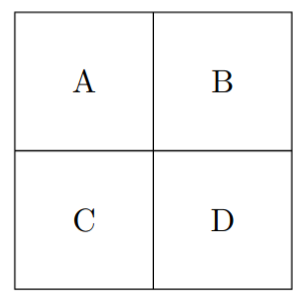

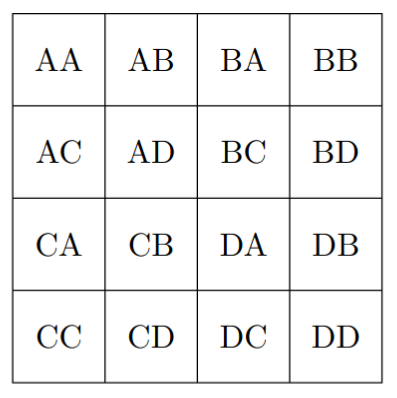

In [98]:
# a simple way to display images from the folder containing the notebook
# if this fails for you, go download the images from the notebook and put them in your folder
from IPython.display import Image, display
display(Image(filename="DNA.png"))
display(Image(filename="DNA2.png"))

Now the general idea is to use this grid as the "base" for a histogram.  In the 4x4 case, we go over all substrings of length 2 from our sequential data (like a DNA string), and create counts for these.  Then we display the grid, with each square coloured according to the count.  A nice way to do this in Sage is to create a matrix of counts and plot the matrix.

To deal with a long string, there are several possible structures that come to mind:  lists, tuples and actual (text) strings.  The difference between a list and tuple is notation: [] vs. () but also, lists are mutable (you can change them), but tuples are not (so have fewer commands).  They can contain objects/items of any type.  Strings are also immutable (can't change in place; need to send to a new string when modifying), but they come with string-like power, like regex, `.split(), .join(), .replace(), .lower()/.upper(), .strip(), .startswith()/.endswith(), .find(), .partition()`.

Lists are very powerful in python.  Here's a cheat-sheet of useful python commands for handling a list:

```
# List methods (these change the list in place)

a.append(x)                              # add item
a.extend(iter)                           # add many (an iterable is something that produces values, like range() or another list )
a.insert(i, x)                           # insert at i
a.remove(x)                              # remove first x
a.pop()                                  # pop last
a.pop(i)                                 # pop at i
a.clear()                                # empty
a.index(x)                               # first index of x
a.count(x)                               # count occurrences of x
a.sort(key=..., reverse=...)             # sort in place
a.reverse()                              # reverse in place
a.copy()                                 # shallow copy

# Built-ins (these return a value)
Some of these return an iterator that needs to be made into a list by list(...)

len(a)                                   # length
sum(a)                                   # sum
min(a); max(a)                           # extrema
any(a); all(a)                           # truth tests, e.g. `any([True, False, False])` returns True
list(iter)                               # make a (finite) iterable into a list
sorted(a, key=..., reverse=...)          # new sorted
reversed(a)                              # reverse order
enumerate(a, start=0)                    # list of (index, item) pairs
zip(a, b, ...)                           # create tuples (first item of a with first item of b, etc.)
map(f, a)                                # apply function f to each element of a
filter(p, a)                             # apply true/false test p to each element of a

# Indexing (return value or list)

a[i]                                     # item a index i
a[i:j]                                   # slice (create sublist from i to j-1)
a[i:j:k]                                 # stride (arithmetic progression sublist)
a[:]                                     # copy of your list
a[-1]                                    # last item of list (also -2, etc.)

# Operations (return something)

a + b                                    # concat lists (a += b to modify in place)
a * n                                    # repeat the list n times into one list (a *= n to modify in place)
x in a                                   # membership (boolean)

# Commands (modify list in place)

del a[i]; del a[i:j]                     # delete
a[i] = x                                 # assign x to the entry at index i (change entry)
a[i:j] = iter                            # replace slice (like assign but for a chunk)
a[i:j:k] = iter                          # strided assign

# Comprehensions (create a new list)

[f(x) for x in a]                        # map (do f to each element)
[x for x in a if p(x)]                   # filter (include each element if passes p)
[f(i, x) for i, x in enumerate(a)]       # with index (do f to each index-element pair)
[y for x in a for y in g(x)]             # flatten (e.g. [[1, 2], [3], [4, 5]] -> [1, 2, 3, 4, 5]

# Unpacking

[*it]                                    # "splat" unpacks the elements for use as arguments etc.
[*a, x]; [*a, *b]                        # extend (i.e., unpack other lists into new lists)
first, *mid, last = a                    # split parts (returns first item, middle list and last item)
```

There are also a ton of functionalities that you can get by importing packages.  This includes advanced sorting, shuffling items, drawing random items, creating combinations, permutations, cartesian products, etc.

Warmup.  Create a function that generates, from a given list, a new list of all the consecutive sublists of length two.  Do this in three totally distinct ways!  Then compare with your neighbour (make sure you understand each other's).  The point is just to get you using and perusing the functionality above.

In [99]:
def sublists_one(a):
    pairs = []
    for i in range(len(a)-1):
        pairs.append(a[i:i+2])
    return pairs

In [100]:
sublists_one([1,2,3,4,5,6,7])

[[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]]

In [101]:
def sublists_two(a):
    return list(zip(a[:-1],a[1:]))

In [102]:
sublists_two([1,2,3,4,5,6,7])

[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7)]

In [103]:
def sublists_three(a):
    return [ [x,a[i+1]] for (i,x) in enumerate(a) if i+1 < len(a)]

In [104]:
sublists_three([1,2,3,4,5,6,7])

[[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]]

One obvious thing that's missing from list manipulations in python (that a mathematician might want) is vector addition.  Here's a Sage way to do that.

In [105]:
a = [1,2,3]
b = [100,200,300]
c = vector(a) + vector(b)
list(c)

[101, 202, 303]

Scalar multiplication is good too!  Multiply a vector by a scalar.

Can you think of a pythonic way to do vector addition of lists (hint: zip, list comprehension)?

In [106]:
c = [x + y for x, y in zip(a, b, strict=True)]
c

[101, 202, 303]

Now, before we dive into our task at hand, a few basic coding principles that make your code robust against bugs and maintainable/usable in future:

1.  *KISS:  Keep it Simple, Stupid.*  Don't make it more complicated than necessary!  For example, don't modularize until you need to; don't use a class until functions won't cut it, etc.  Readability is king, even just for your future self.

2.  *DRY:  Don't Repeat Yourself.*  The most basic example is don't type a command multiple times if you can type it once and put it in a for loop.  If you are cut-n-pasting code with small modifications, *stop right now*.  Find another way.  You'll regret it later when you want to modify your code.

3.  *Single Source of Truth.*  This is a type of DRY.  If you have some parameter/value (for example, a scaling factor), don't hard-code it in three places.  Give it a variable name and refer to that variable whenever you need it.  Then you can change it with one change (the single source of truth).

4.  *Document.*  Help your future self.  Explain.  You can use `#` to place comments.

Ok, back to our goal:  To fill a matrix with a histogram of substrings of length two (let's stick to 4x4 for now).  

We may not want to create a list of substrings of length two, why use all that memory?  Instead we can move through the provided list and update our counters for the various boxes in our 4x4 display.  Take a first stab at creating something that does this.  Instructions:

1. takes in a list that you can assume has all items from among '0', '1', '2', '3'.
2. gives out a 4x4 matrix in the manner described above
3. keep in mind coding principles

Another structure that may help you out here is called a dictionary.  It's like a lookup table.  Here's the basic syntax:
```
T = {0: "a", 1: "b", 2: "c"} 
```
Then you can do `T[0]` to get `"a"`.  In this example the "keys" are integers, but anything can be a key.

It's always good to break things up into self-contained pieces or tasks.  So first start by making code that takes in a length-two string (or pair) and outputs the box that should be updated, i.e. the coordinates in the 4x4 matrix.

In [108]:
# the grid layout (this is an optional hint, can use this dictionary if desired)
ID = {0: [0,0], 1: [1,0], 2: [0,1], 3: [1,1]}    

def indices(pair): # takes in a pair and gives out the location in the 4x4 matrix
    ind = vector([0,0])
    ind += vector(ID[pair[0]])*2 # move to correct quadrant
    ind += vector(ID[pair[1]]) # move to correct subquadrant
    return ind

In [109]:
# run some sanity checks
indices([2,1])

(1, 2)

Now the main event, this is the function that takes in a list that you can assume has all items from among '0', '1', '2', '3'.
and gives out a 4x4 matrix in the manner described above.

In [110]:
def grid(a): # takes in a list a, outputs a 4x4 matrix
    m = matrix(4,4)
    for i in range(len(a)-1):
        pair = a[i:i+2]
        ind = indices(pair)
        #print(pair, ind)
        m[*ind] += 1
    return m

The following cell should produce
```
[0 0 0 3]
[1 0 1 1]
[0 2 1 1]
[0 1 0 1]
```
(You can check this by doing it by hand...)

In [111]:
grid([1,2,2,2,1,3,2,2,3,3,0,1,2])

[0 0 0 3]
[1 0 1 1]
[0 2 1 1]
[0 1 0 1]

Now, up your game so you can input n such that you get a 2^n x 2^n matrix.  Copy and modify the code you used above.  (Wait!  Doesn't this contradict DRY?  Well, here we are really just replacing the previous code, which will be a historical artifact in a cell above.  But this next version is our new and improved version.  But use different function names, to save yourself from confusion!

In [112]:
# the grid layout
ID = {0: [0,0], 1: [1,0], 2: [0,1], 3: [1,1]}    

def n_indices(substr, n): # takes in a substr length n and gives out the location in the matrix
    ind = vector([0,0])
    for i in range(n):
        ind += vector(ID[substr[i]])*2^(n-i-1) # move to correct subquadrant
    return ind

def n_grid(a,n): # takes in a list a and exponent n, outputs a 2^n x 2^n matrix
    dim = 2^n
    m = matrix(dim,dim)
    for i in range(len(a)-n+1):
        substr = a[i:i+n]
        #print(substr)
        ind = n_indices(substr,n)
        m[*ind] += 1
    return m


In [113]:
# this should reproduce the earlier result
n_grid([1,2,2,2,1,3,2,2,3,3,0,1,2],2)

[0 0 0 3]
[1 0 1 1]
[0 2 1 1]
[0 1 0 1]

In [114]:
# but this should also work!
# correct answer:
# [0 0 0 0 0 0 0 1]
# [0 0 0 0 0 0 1 1]
# [0 1 0 0 0 0 0 0]
# [0 0 0 0 0 1 0 1]
# [0 0 0 1 0 0 0 1]
# [0 0 0 0 1 0 0 0]
# [0 0 0 1 0 0 1 0]
# [0 0 0 0 0 0 0 0]
n_grid([1,2,2,2,1,3,2,2,3,3,0,1,2],3)

[0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 1 1]
[0 1 0 0 0 0 0 0]
[0 0 0 0 0 1 0 1]
[0 0 0 1 0 0 0 1]
[0 0 0 0 1 0 0 0]
[0 0 0 1 0 0 1 0]
[0 0 0 0 0 0 0 0]

Looks like we're ready!  Now generate a random list called "rand" that's of length 10^5 to try this on.

In [115]:
rand = [ randint(0,3) for _ in range(10^5)]

Range of values: 8 42


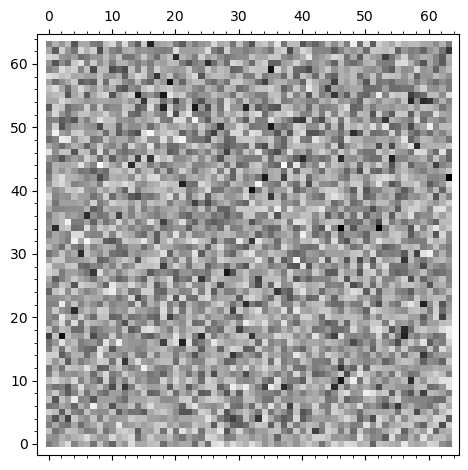

In [140]:
# here's a nice way to display
def pretty_dna(list):
    mat = n_grid(list, 6)
    print("Range of values:", min(mat.list()), max(mat.list()))
    plot(mat, axes=False, frame=True).show()
pretty_dna(rand)

That should give you a visual sense of the fluctuation level one can expect from random data.   Now generate a list of the first 10^5 primes > 5 (lots, experiment) modulo 10.  These result in an alphabet $1,3,7,9$.  Apply your new method to these!  Matrix plot the result.

In [142]:
# create a list called "prim" suitable for n_grid
rawresidues = [ ZZ(mod(nth_prime(n),10)) for n in range(4,10^5)]
primes_dict = {1: 0, 3: 1, 7: 2, 9: 3}    
prim = [ primes_dict[x] for x in rawresidues]

Range of values: 0 117


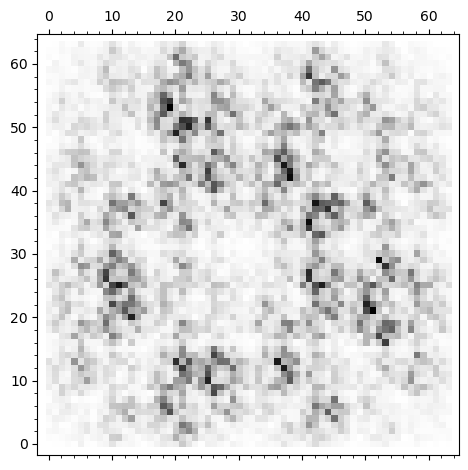

In [143]:
# then try this out
pretty_dna(prim)

Interesting!  What does this mean? 

## Further exploration

Another favourite of mine is the Moebius function.  Try it!

In [137]:
# create a list called "mob" suitable for n_grid
mob = [ mod(moebius(n),4) for n in range(1,10^5)]

Range of values: 0 634


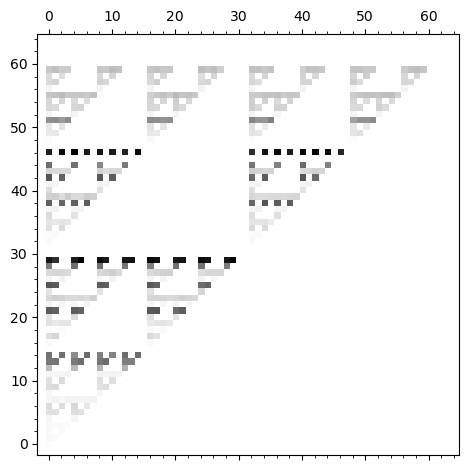

In [144]:
# then do a DNA plot of it
pretty_dna(mob)

The result looks patternful, but the most obvious pattern has a simple explanation, what is it?

Do you know how a `while` loop works?  It can be a useful alternative to a for loop in some cases.  Guess what the following example does before you try it.

In [129]:
i = 0
while i < 5:
    j = 0
    while j < i:
        print(i,j)
        j += 1
    i += 1

1 0
2 0
2 1
3 0
3 1
3 2
4 0
4 1
4 2
4 3


I'm still obsessed with runs in legendre symbols.  Write a function that computes the list of run lengths in the list of Legendre symbols.

In [123]:
# takes in a prime, returns a list of run lengths for the first half of the list of Legendre symbols
def runs(p):
    runs = []
    i = 2
    start = 1
    val = 1
    while i < floor(p/2):
        nextval = legendre_symbol(i,p)
        if nextval != val:
            runs.append(i - start)
            val = nextval
            start = i
        i += 1
    return runs

In [132]:
p = next_prime(50)
runs(p)

[1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 3, 6, 2, 2, 2, 6, 3, 1, 1, 1, 3, 1, 2, 1, 1, 2]

Now do a DNA plot of this data mod 4, for a big prime.

Range of values: 0 2380


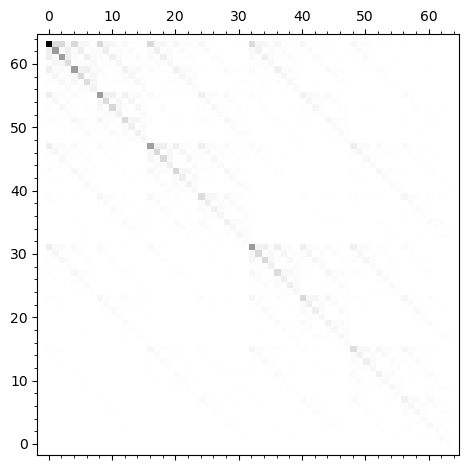

In [145]:
# here's a decently big prime that will take a minute to run...
p = next_prime(2*10^5)
pretty_dna([mod(run,4) for run in runs(p)])

This plot looks patternful, but there's a simple explanation.  What is it?